# AUDIO FILE PROCESSING

## How to deal with audio with different length in Audio Classification?

#### Question raised on https://dsp.stackexchange.com/questions/44497/how-to-deal-with-audio-with-different-length-in-audio-classification/75665#75665

### Here we show how extracting a feature matrix from a mel-frequency spectogram  whose shape does not change with audio length

Authors: José Hidalgo, PhD,  Diego Frias, PhD.

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

shape of original wav file  (117601,)  found sampling rate  22050  sound time  5.333378684807256 (s)


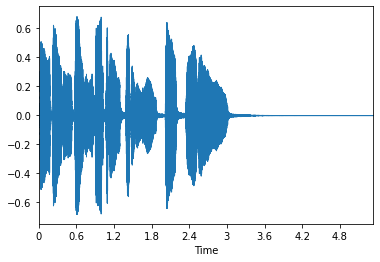

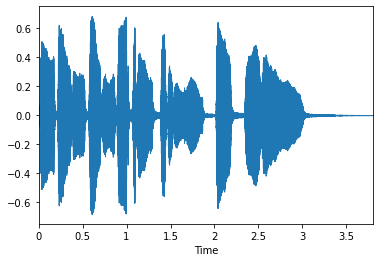

shape of trimmed wav file  (83968,)  found sampling rate  22050  sound time  3.8080725623582765 (s)


In [2]:
# READING AN EXAMPLE AUDIO FILE

filename = librosa.ex('trumpet') 
y, sr = librosa.load(filename)
librosa.display.waveplot(y, sr=sr)
print("shape of original wav file ",y.shape, ' found sampling rate ',sr," sound time ",y.shape[0]/sr,"(s)")
plt.show()

# trim silent edges
y, _ = librosa.effects.trim(y)
librosa.display.waveplot(y, sr=sr)
plt.show()
print("shape of trimmed wav file ",y.shape, ' found sampling rate ',sr," sound time ",y.shape[0]/sr,"(s)")


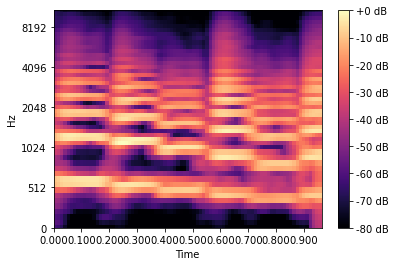

 audio length  0.95 (s)
 Spectogram shape  (50, 83)


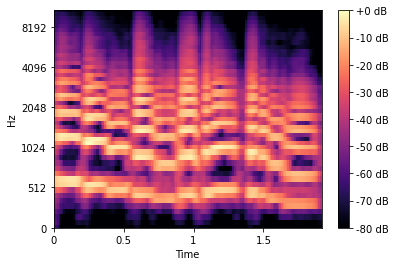

 audio length  1.9 (s)
 Spectogram shape  (50, 165)


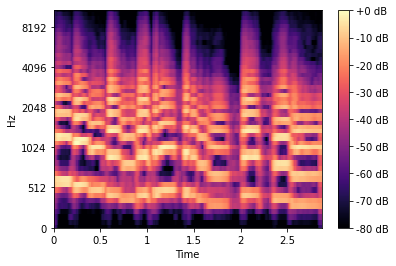

 audio length  2.86 (s)
 Spectogram shape  (50, 247)


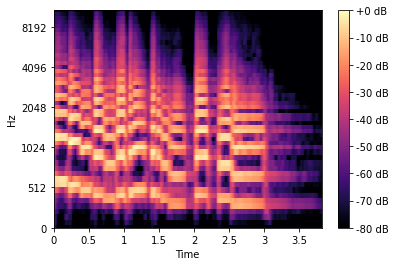

 audio length  3.81 (s)
 Spectogram shape  (50, 329)


In [3]:
# CALCULATING AND VISUALIZING MEL-FREQUENCY SPECTOGRAMS FOR DIFFERENT LENGTHS OF THE SAME AUDIO FILE

AudioLength = len(y)

n_mels = 50 # number of frequency channels

n_fft = 2048 # fft window  (determine the maximum frequency of the spectrum)

hop_length = 256 # jump of the window (chosen here as 1/8 of the fft window)

# varying the length from 25% to 100% with stride of 25%

ncols=[] # list to save the number of columns in the melspectogram matrix output for each audio length
alngt=[] # list of audio lengths

for length in np.arange(0.25,1.01,0.25):
    
    # getting the audio segment
    alngt.append(int(length*AudioLength))
    audio=y[:alngt[-1]]
    
    # calculating the melspectogram (with the sampling rate original of the file)
    
    S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    #tranforming the spectogram to decibels
    
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    # displaying the spectrogram
    
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    
    plt.colorbar(format='%+2.0f dB');
    plt.show()

    print(" audio length ",round(len(audio)/sr,2),"(s)")
    print(" Spectogram shape ",S.shape)
    ncols.append(S.shape[1])


## discussion

The number of columns of the spectogram increases linearly with audio length  (see figure below)


 audio length  0.95 (s)       Spectogram shape  (50, 83)

 audio length  1.9 (s)        Spectogram shape  (50, 165)

 audio length  2.86 (s)       Spectogram shape  (50, 247)

 audio length  3.81 (s)       Spectogram shape  (50, 329)

Text(0, 0.5, 'number of columns in the spectogram')

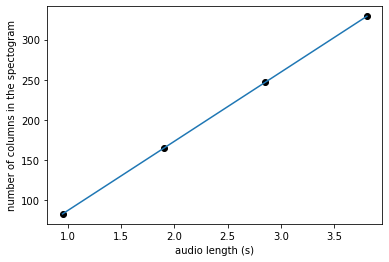

In [4]:
plt.plot(np.divide(alngt,sr),ncols,'ko')
plt.plot(np.divide(alngt,sr),ncols)
plt.xlabel('audio length (s)')
plt.ylabel('number of columns in the spectogram')

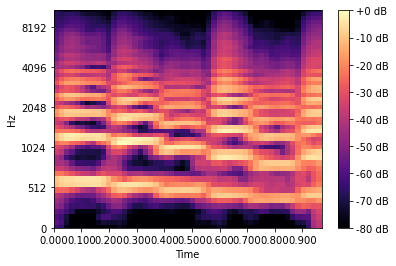

 audio length  0.95 (s)
 Spectogram shape  (50, 51)


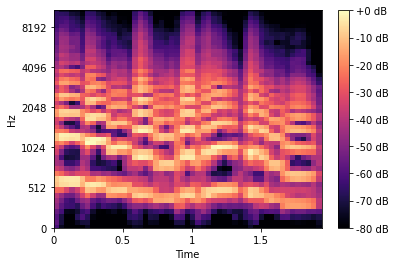

 audio length  1.9 (s)
 Spectogram shape  (50, 51)


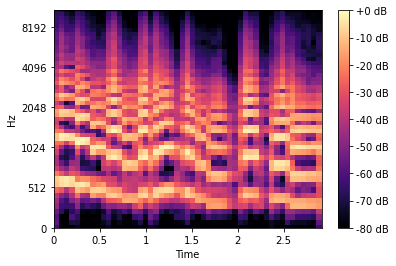

 audio length  2.86 (s)
 Spectogram shape  (50, 51)


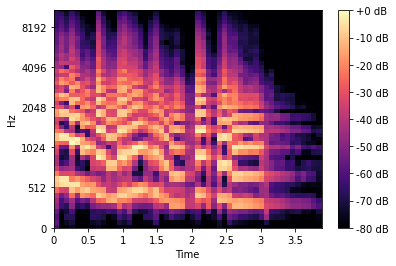

 audio length  3.81 (s)
 Spectogram shape  (50, 51)


In [6]:
# CALCULATING AND VISUALIZING MEL-FREQUENCY SPECTOGRAMS FOR DIFFERENT LENGTHS OF THE SAME AUDIO FILE USING 
# CALIBRATED HOP LENGTH FOR OBTAINING AN ALMOST SQUARE MATRIX AS OUTPUT 

AudioLength = len(y)

n_mels = 50 # number of frequency channels

n_fft = 2048 # fft window  (determine the maximum frequency of the spectrum)

# varying the length from 25% to 100% with stride of 25%

ncols=[] # list to save the number of columns in the melspectogram matrix output for each audio length
alngt=[] # list of audio lengths

for length in np.arange(0.25,1.01,0.25):
    
    # getting the audio segment
    alngt.append(int(length*AudioLength))
    audio=y[:alngt[-1]]
     
    # NEW - ADAPT HOP LENGTH
    hop_length=int(alngt[-1]/n_mels)
    
    # calculating the melspectogram (with the sampling rate original of the file)
    
    S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    #tranforming the spectogram to decibels
    
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    # displaying the spectrogram
    
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    
    plt.colorbar(format='%+2.0f dB');
    plt.show()

    print(" audio length ",round(alngt[-1]/sr,2),"(s)")
    print(" Spectogram shape ",S.shape)
    ncols.append(S.shape[1])


## final discussion

The results above show that "calibrating" the hop length paramter of the melspectograma function the number of columns of the spectogram is constant, independent of the audio length and also of the fft window size (n_fft) and that the number of columns is equal to the number of frequency channels (n_mels) plus one, in some cases, due to float to integer rounding.

The calibration of the hop lemgth consists in dividing the length of the input signal by the number of frequency channels. 

 